# Fruitfly Dataset: *Drosophila melanogaster*

For this experiment, we will be doing low throughput analysis on Drosophila Melanogaster female ovarian cells. 

The ovaries in D. melanogaster is a prime site for cell biology studies; the ovaries contain three stem cell populations (somatic, germline, and escort), making it quite useful and reliable for stem cell identification and for understanding how stem cells collaborate to contribute to tissue formation and function. Each ovary will have multiple rounds of oogenesis occuring as well. D. melanogaster is also well-known for its genomic simplicity and biological complexity, making it a prime model organism for several fields of research.

The cells chosen in this set are from 3-day-old female ovaries.

Access to the raw dataset is available on NCBI GEO: https://www.ncbi.nlm.nih.gov/Traces/study/?acc=PRJNA609111&o=acc_s%3Aa


### Import Libraries

To begin, let's run the following two cells to install the libraries and packages that we will need for our analysis.

In [ ]:
!pip install scanpy
!pip install harmonypy
!pip install scikit-misc
!pip3 install leidenalg

In [ ]:
while True:
    try:
        import sys
        import os
        import numpy as np
        import pandas as pd
        import scanpy as sc
        import seaborn as sb
        import matplotlib.pyplot as plt
        break
    except:
        print("***Some packages have not been installed. Installing now...***")
        import subprocess
        import urllib.request

        # Retrieve installer if not available
        remove = False
        if not os.path.exists("get-pip.py"):
            urllib.request.urlretrieve("https://bootstrap.pypa.io/get-pip.py", "get-pip.py")
            remove = True
        subprocess.check_call([sys.executable, "get-pip.py"])
        # Download and install packages if not installed
        subprocess.check_call([sys.executable, "-m", "pip", "install", "numpy"])
        subprocess.check_call([sys.executable, "-m", "pip", "install", "pandas"])
        subprocess.check_call([sys.executable, "-m", "pip", "install", "seaborn"])
        subprocess.check_call([sys.executable, "-m", "pip", "install", "scanpy"])
        subprocess.check_call([sys.executable, "-m", "pip", "install", "matplotlib"])

        # Packages used but not included in scanpy package
        subprocess.check_call([sys.executable, "-m", "pip", "install", "harmonypy"])
        subprocess.check_call([sys.executable, "-m", "pip", "install", "scikit-misc"])
        subprocess.check_call([sys.executable, "-m", "pip", "install", "leidenalg"])

        # Remove installer if it wasn't available before for discretion
        if remove: os.remove("get-pip.py")
print("Package import success!")

Package import success!


### Parse Commands and Import data

These will be default numbers if the user does not change these inputs. Much of these are variable throughout experiments so the defaults will be basic at best.

In [ ]:
file_location = "data/"
batch_effect = None
n=-1                    #Initialized later
cluster_res = 1.0
min_cells = 0
min_genes = 0
genes = []

cellranger_script =""
string_id=""
reference_transcriptome=""
fastqs=""
sample=""
expected_cells=0
local_cores=0
local_mem=0

In [ ]:
#Cellranger Arguments
cellranger_script_arg = "--script"
string_id_arg = "--id"
reference_transcriptome_arg = "--transcriptome"
fastqs_arg = "--fastqs"
sample_arg = "--sample"
expected_cells_arg = "--min_genes"
local_cores_arg = "--cores"
local_mem_arg = "--mem"

These arguments will be dependent on user input. User will check visualizations and other experiment variables to decide input to optimize the experiment to their needs.



In [ ]:
#Scanpy Arguments
file_arg = "--loc"
batch_arg = "--batch"
n_arg = "--neighbors"
resoution_arg = "--res"
cell_arg = "--min_cells"
gene_arg = "--min_genes"
display_arg = "--genes"

Parse arguments for some user inputs. Our python script will check these arguments but they are currently not necessary in our jupyter notebook.


In [ ]:
args = sys.argv[1:]
for arg in args:
    if file_arg+"=" in arg:
        file_location = arg[arg.index("=") + 1:]
    elif batch_arg+"=" in arg:
        batch_effect = arg[arg.index("=") + 1:]
    elif n_arg+"=" in arg:
        n = int(arg[arg.index("=") + 1:])
    elif resoution_arg+"=" in arg:
        cluster_res = float(arg[arg.index("=") + 1:])
    elif cell_arg+"=" in arg:
        min_cells = float(arg[arg.index("=") + 1:])
    elif gene_arg+"=" in arg:
        min_genes = float(arg[arg.index("=") + 1:])

    elif cellranger_script_arg+"=" in arg:
        cellranger_script = arg[arg.index("=") + 1:]
    elif string_id_arg+"=" in arg:
        string_id = arg[arg.index("=") + 1:]
    elif reference_transcriptome_arg+"=" in arg:
        reference_transcriptome = arg[arg.index("=") + 1:]
    elif fastqs_arg+"=" in arg:
        fastqs = arg[arg.index("=") + 1:]
    elif sample_arg+"=" in arg:
        sample = arg[arg.index("=") + 1:]
    elif expected_cells_arg+"=" in arg:
        expected_cells = float(arg[arg.index("=") + 1:])
    elif local_cores_arg+"=" in arg:
        local_cores = float(arg[arg.index("=") + 1:])
    elif local_mem_arg+"=" in arg:
        local_mem = float(arg[arg.index("=") + 1:])

    elif display_arg+"=" in arg:                 #Genes listed must be comma separated
        genes = arg[arg.index("=") + 1:].split(",")

    else: pass
        #sys.exit(arg+" is not a valid argument!")

 ***
Lets read in the data from the cellranger output. Cellranger outputs a features.tsv file, a barcode file, and the matrix file. Features are the genes, barcode are the cells, and the matrix is the actual data. Anndata is a Scanpy object that can hold all these important variables and data.

In [ ]:
adata = sc.read_10x_mtx("data/")
if n == -1:
  n = round(np.sqrt(adata.n_obs))

### View Data

There are approximately 7053 cells in our dataset and about 11782 genes in our dataset for downstream analysis.


In [ ]:
print("adata.obs length: "+str(adata.n_obs))
adata.obs.head()

adata.obs length: 30671


""
AAACCTGAGACAAAGG-1
AAACCTGAGATATACG-1
AAACCTGAGCAGGTCA-1
AAACCTGAGCCACCTG-1
AAACCTGAGCTACCTA-1


In [ ]:
print("adata.var length: "+str(adata.n_vars))
adata.var.head()

adata.var length: 13968


,gene_ids,feature_types
gfzf,FBgn0250732,Gene Expression
Osi24,FBgn0037409,Gene Expression
msps,FBgn0027948,Gene Expression
CG6013,FBgn0038675,Gene Expression
Dsk,FBgn0000500,Gene Expression


Lets view the highest expressed genes.

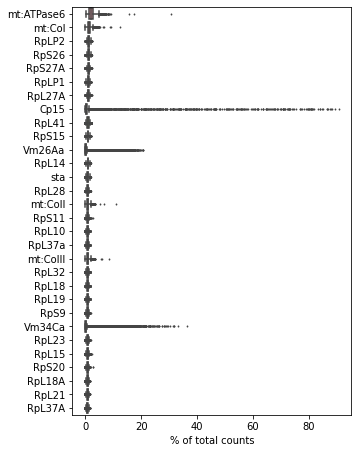

In [ ]:
sc.pl.highest_expr_genes(adata)

There are quite a number of mitochondrial and ribosomomal genes being expressed here. In terms of representation in total count %, however, Cp15, Vm26Aa, and Vm34Ca are above the rest. 

Cp15, or Chorion protein 15 encodes for Chorion protein S15 protein. Its role lies in development of the shell for protection of the eggs within the ovary. 

Vm26Aa and Vm34Ca seem to both be involved as early eggshell proteins as well. 

Some of the ribosomal protein coding genes like sta are involved in oogenesis which makes sense to why we see their expression here.

## Quality Control

### Basic Filtering

Our first important step in our analysis will be to do some quality control. Our 3 most important steps of quality control are:
- Basic filtering 
- Removal of highly expressed genes
- Batch Effect correction

In a standard scRNAseq experiment, there will be 4 steps, including removing MT reads. But of course, of spaceflight experiments, we at Genelab have decided to not include this step in our analysis.

***

Our analysis library of choice, scanpy, has a convient function that allows us calculate a number of quality metrics about the data. 

sc.pp.calculate_qc_metrics will give us 2 dataframes, a cell quality dataframe and a gene quality dataframe.

In [ ]:
# Quality control - calculate QC cmetrics
stats = sc.pp.calculate_qc_metrics(adata)
cell_qc_dataframe = stats[0]
gene_qc_dataframe = stats[1]

Lets take a quick look at the cell and gene qc dataframes.

In [ ]:
cell_qc_dataframe.head()

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes
AAACCTGAGACAAAGG-1,1082,6.987490,4613.0,8.436851,45.523520,67.418166,77.108173,87.383481
AAACCTGAGATATACG-1,1029,6.937314,5586.0,8.628198,54.833512,72.144647,81.238811,90.529896
AAACCTGAGCAGGTCA-1,882,6.783325,2332.0,7.754910,34.476844,50.428816,65.694683,83.619211
AAACCTGAGCCACCTG-1,797,6.682109,3685.0,8.212297,49.253731,72.781547,81.899593,91.940299
AAACCTGAGCTACCTA-1,944,6.851185,3829.0,8.250620,44.476365,64.638287,76.338470,88.404283


In [ ]:
gene_qc_dataframe.head()

,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
gfzf,608,0.020345,0.020141,98.017671,624.0,6.437752
Osi24,22,0.000750,0.000750,99.928271,23.0,3.178054
msps,4034,0.156565,0.145454,86.847511,4802.0,8.476996
CG6013,1391,0.048319,0.047188,95.464771,1482.0,7.301822
Dsk,4,0.000130,0.000130,99.986958,4.0,1.609438


These metrics will be used to graph our quality control graphs to find thresholds.

***

No filtering is needed in this case as there are no cells with less than 250 genes.

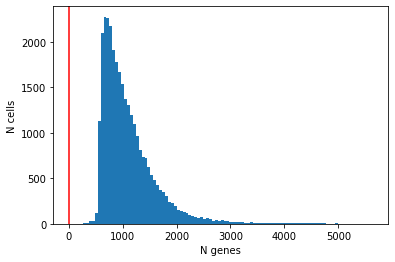

In [ ]:
fig, ax = plt.subplots()
plt.axvline(0, color='red')

plt.hist(cell_qc_dataframe['n_genes_by_counts'], bins=100)
plt.xlabel('N genes')
plt.ylabel('N cells')
plt.show()

Our next order of business is to filter out genes that who have low expression levels across cells. It is important to do gene filtering after cell filtering because some genes may be detected only in low quality cells. 

Lets start by graphing cells vs the number of genes they express. 

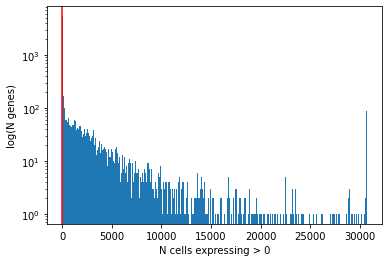

In [ ]:
fig, ax = plt.subplots()
plt.axvline(0, color='red')

plt.hist(gene_qc_dataframe['n_cells_by_counts'], bins=1000)
plt.xlabel('N cells expressing > 0')
plt.ylabel('log(N genes)') 
plt.yscale('log')
plt.show()

It seems as if most cells express a good number of genes, which we would expect as a cell. Lets take a closer look at at around zero.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  


(0.0, 10.0, 0.651056787746231, 100000.0)

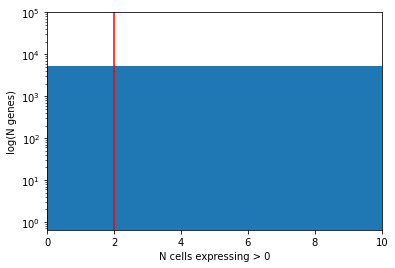

In [ ]:
plt.hist(gene_qc_dataframe['n_cells_by_counts'], bins=1000)
plt.xlabel('N cells expressing > 0')
plt.axvline(2, color='red')
plt.ylabel('log(N genes)') 
plt.yscale('log')
plt.axis([0, 10, 0, 100000])

In this case, 2 will be a good line for the threshold. 




For our defaults, because basic filtering be extremely variable throughout experiments, we have decided to keep defaults at 1% until user input after seeing graphs. However, in this experiment, it is not really necessary to do any cell filtering so we will change cell to 0 and and make gene filter at a flat 2.

In [ ]:
unfiltered_genes = adata.var_names
cell_filter_percentile = 0.01
gene_filter_percentile = 0.01

cell_filter_percentile = 0
gene_filter_percentile = 2


#### Filter

In [ ]:
if min_cells != 0 or min_genes != 0:             #User input filtering
  sc.pp.filter_cells(adata, min_genes = min_cells)
  sc.pp.filter_genes(adata, min_cells = min_genes)
else:                                            #Percentile-based filtering (default)
  stats = sc.pp.calculate_qc_metrics(adata)
  gene_counts_mean = np.mean(stats[0]['n_genes_by_counts'])
  cell_counts_mean = np.mean(stats[1]['n_cells_by_counts'])

  sc.pp.filter_cells(adata, min_genes = 0)
  sc.pp.filter_genes(adata, min_cells = 2)

#### To compare filter results

Batch effect correction is a quality control method of lowering technical noise. It can help us visualize more complete clusters.

In [ ]:
# Review obs after draft is complete
if not batch_effect == None:
  sc.pp.pca(adata)
  sc.external.pp.harmony_integrate(adata, key=batch_effect)

### Normalize and Logarithmize Data

As its name suggests, sc.pp.normalize_total will normalize the total number of counts per cell so that every cell will have the same number of total counts. Normalization will help to preserve biological heterogeneity without the influence of any technical noise like sequencing depth and gene abundance.

target_sum = 1e6 here refers to counts per million. 

Although different methods of normalization does exist, that are more accurate and have better performance, the CPM method is more flexible and scalable to all datasets and pipelines making it the best choice for our Genelab pipeline.

sc.pp.log1p helps to logarithmize the data to improve data "symmetry" on a linear scale for more relevant and accurate data. For further information on this topic, feel free to check out the following link: https://blog.qbaseplus.com/seven-tips-for-bio-statistical-analysis-of-gene-expression-data

In [ ]:

sc.pp.normalize_total(adata,target_sum=1e6)
sc.pp.log1p(adata)

### Remove highly variable genes

Determine and remove highly variable genes based on each genes' mean and variance. Removing these genes eliminates noise due to high variability in the data.

Algorithm: Each gene is put into 20 'bins' based and their mean and variance. Each gene is then normalized based on the other genes in their bin. If a gene's normalized dispersion is greater or equal to a z-score of 2 (~98th percentile) AND the gene has a low mean cell count, it is marked highly variable.

Note: warning just means it will proceed to automatically calculate PCA since it was not done beforehand.

In [ ]:
sc.pp.highly_variable_genes(adata, flavor='seurat', min_disp=2)
highly_variable = adata[:, adata.var.highly_variable==True].var_names
print(str(len(adata.var[adata.var['highly_variable']==True]))+"/"+str(adata.n_vars)+" genes are highly variable")
adata = adata[:, adata.var.highly_variable==False]

201/11319 genes are highly variable


### K-Nearest Neighbors

Calculate the distance between each cell using the KNN algorithm. Distances will be used to cluster the cells in the next step.

Default (n=sqrt(adata.n_obs)): setting n as the square root of the length of the data is the general consensus if n is not provided.

Sources:

https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb

https://discuss.analyticsvidhya.com/t/how-to-choose-the-value-of-k-in-knn-algorithm/2606/7

https://stackoverflow.com/questions/11568897/value-of-k-in-k-nearest-neighbor-algorithm

In [ ]:
sc.pp.neighbors(adata, n_neighbors=n)

         Falling back to preprocessing with `sc.pp.pca` and default params.


### Cluster

Cluster/Group each cell based on the distances calculated in the previous step using the Leiden algorithm.

'resolution' determines the amount of clusters that will be formed (default: 1.0. The higher the resolution, the more clusters in the result)

In [ ]:
sc.tl.leiden(adata, resolution=cluster_res)

## Visualize Results

Prepares the data to be visualized by simplifying multiple dimensions down to two dimensional coordinates using the UMAP algorithm. 

This algoithm also uses the distances calculated using 'neighbors()' 

In [ ]:
sc.tl.umap(adata)

### Clusters

Plot the UMAP data and color based on the clusters determined previously. We will later use label these clusters with cell types using marker gene identification.


... storing 'feature_types' as categorical


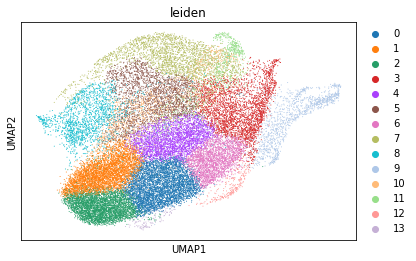

In [ ]:
sc.pl.umap(adata, color=['leiden'])

### Color based on selected gene(s)

Color cells based on their expression of a specific gene. If list of genes was not provided, the first 16 genes will be displayed.

Note: purple = no expression

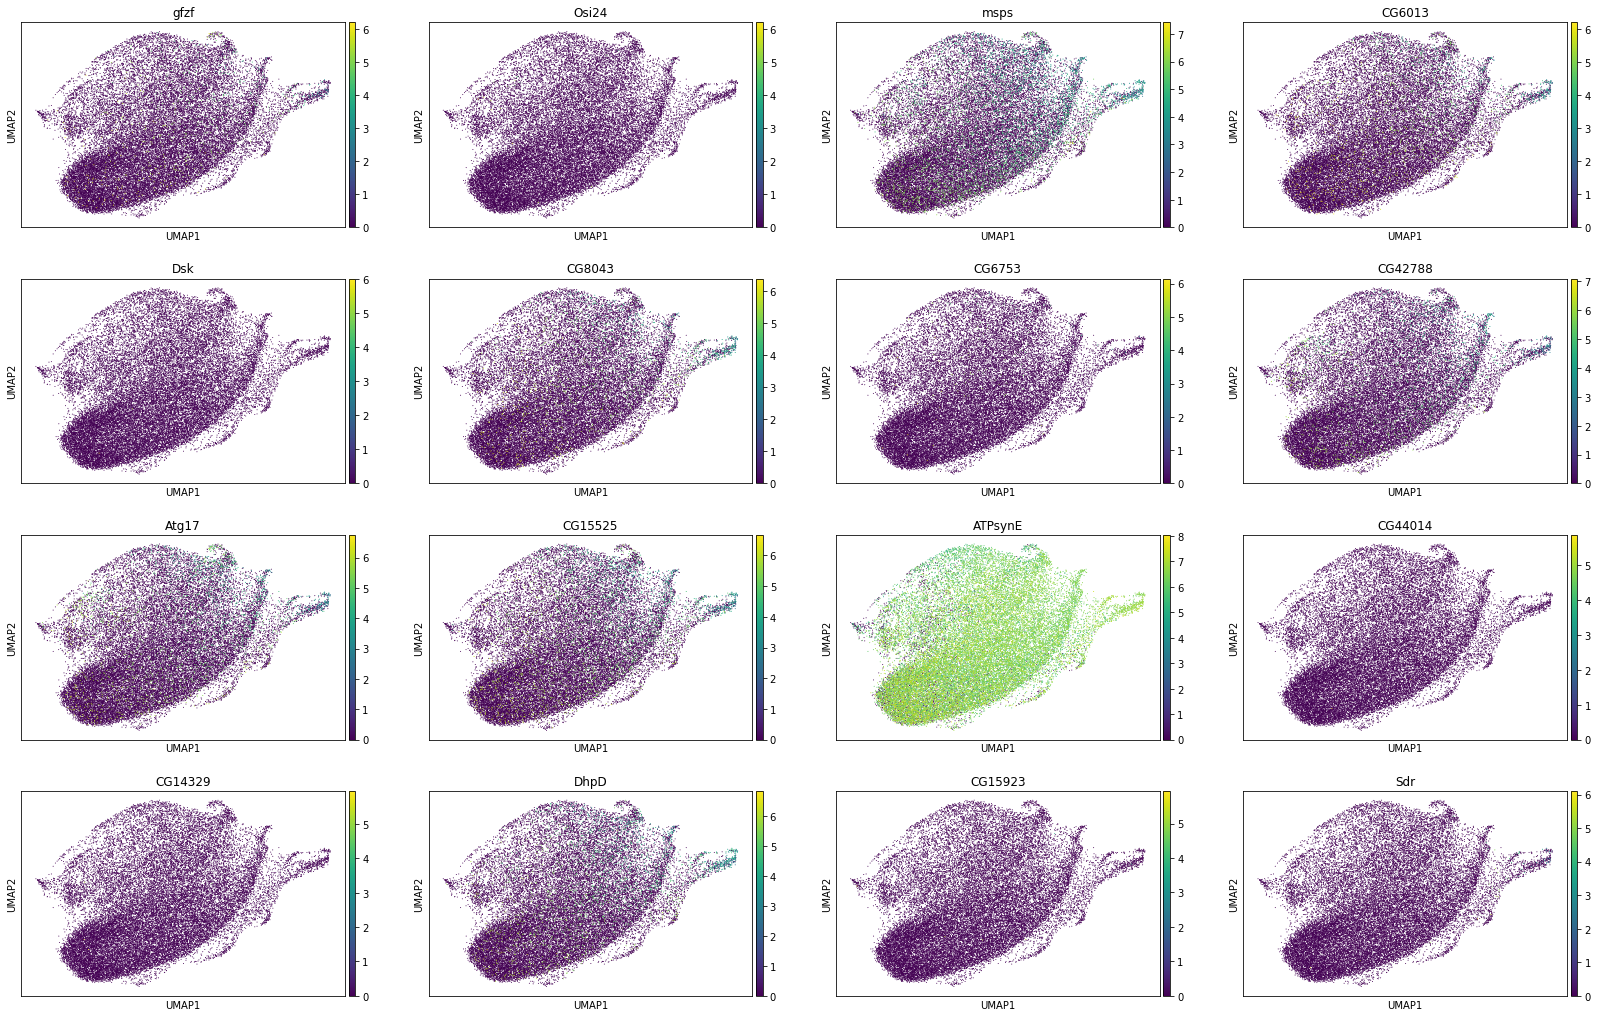

In [ ]:
view_genes = []
if len(genes) != 0:    #Display selected genes' expression
    for gene in genes:
        if gene in adata.var_names:
            view_genes.append(gene)
        elif gene in highly_variable:
            print(gene+" gene was highly variable and was filtered out.")
        #elif gene in filtered_genes:
        #    print(gene+" gene had been filtered out.")
        else:
            print(gene+" gene does not exist in the dataset.")
else:                  #Display expression of the first 16 genes in adata
    #View the first 16 genes
    view_genes = []
    i = 16
    for gene in adata.var_names:
        view_genes.append(gene)
        i -= 1
        if i==0: break

sc.pl.umap(adata, color=view_genes)

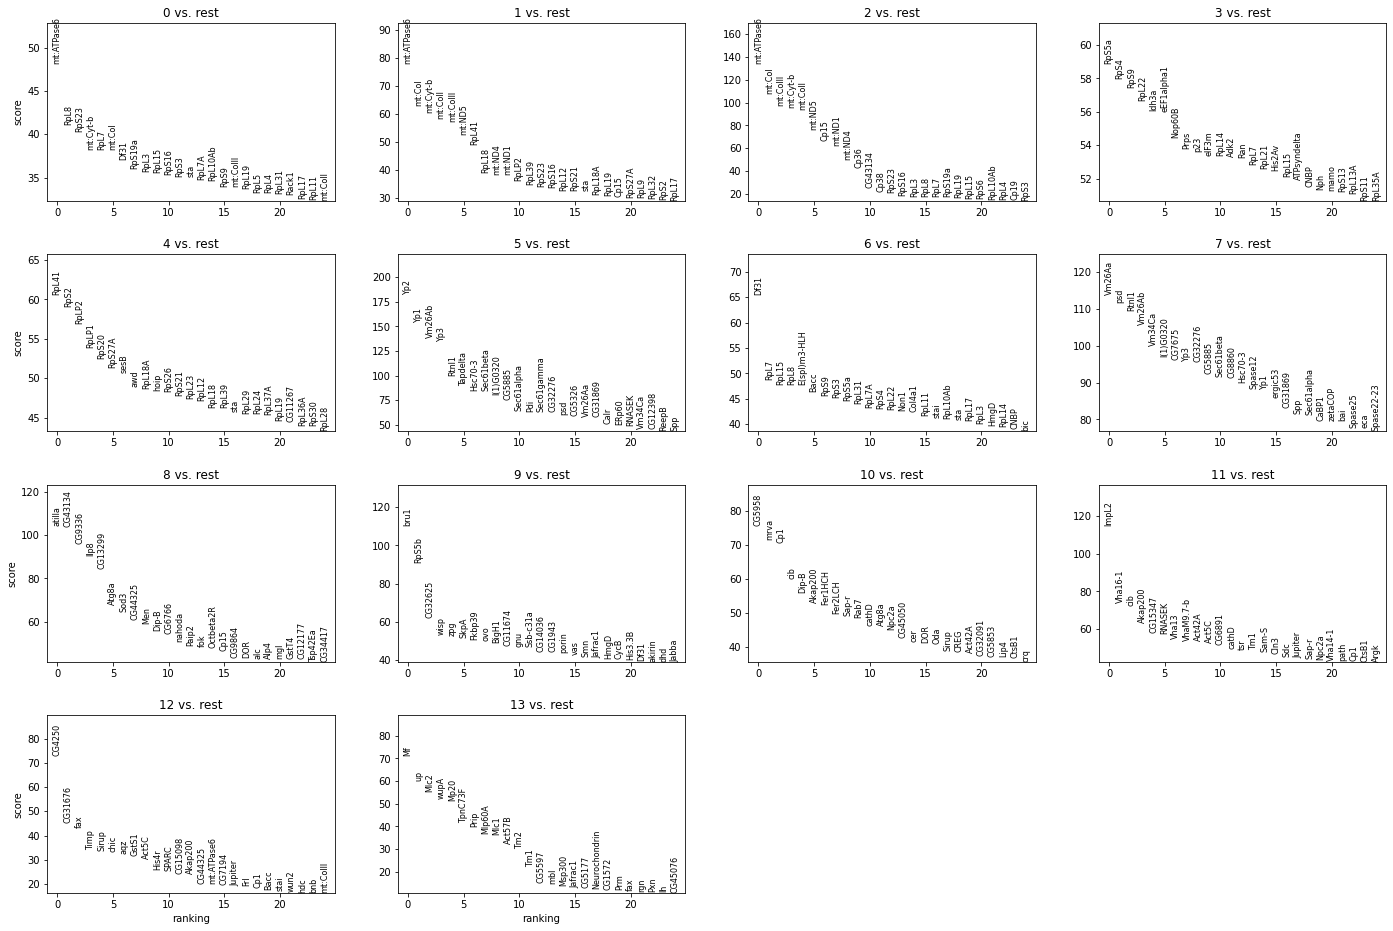

In [ ]:
results_file = 'write/drosophila.h5ad'
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

#Annotation Step

Rank the genes according to the cluster.


In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')

In [ ]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,mt:ATPase6,mt:ATPase6,mt:ATPase6,RpS5a,RpL41,Yp2,Df31,Vm26Aa,atilla,bru1,CG5958,ImpL2,CG4250,Mf
1,RpL8,mt:CoI,mt:CoI,RpS4,RpS2,Yp1,RpL7,psd,CG43134,RpS5b,mrva,Vha16-1,CG31676,up
2,RpS23,mt:Cyt-b,mt:CoIII,RpS9,RpLP2,Vm26Ab,RpL15,Rtnl1,CG9336,CG32625,Cp1,cib,fax,Mlc2
3,mt:Cyt-b,mt:CoII,mt:Cyt-b,RpL22,RpLP1,Yp3,RpL8,Vm26Ab,Ilp8,wisp,cib,Akap200,Timp,wupA
4,RpL7,mt:CoIII,mt:CoII,Idh3a,RpS20,Rtnl1,E(spl)m3-HLH,Vm34Ca,CG13299,zpg,Dip-B,CG15347,Sirup,Mp20
5,mt:CoI,mt:ND5,mt:ND5,eEF1alpha1,RpS27A,Tapdelta,Bacc,l(1)G0320,Atg8a,SkpA,Akap200,RNASEK,chic,TpnC73F
6,Df31,RpL41,Cp15,Nop60B,sesB,Hsc70-3,RpS9,CG7675,Sod3,Fkbp39,Fer1HCH,Vha13,aqz,Prip
7,RpS19a,RpL18,mt:ND1,Prps,awd,Sec61beta,RpS3,Yp3,CG44325,ovo,Fer2LCH,VhaM9.7-b,GstS1,Mlp60A
8,RpL3,mt:ND4,mt:ND4,p23,RpL18A,l(1)G0320,RpS5a,CG32276,Men,BigH1,Sap-r,Act42A,Act5C,Mlc1
9,RpL15,mt:ND1,Cp36,eIF3m,hoip,CG5885,RpL31,CG5885,Dip-B,CG11674,Rab7,Act5C,His4r,Act57B


Marker genes file needed to be transposed here so just quickly transposing.

In [ ]:
df = pd.read_csv("D_melanogaster_genes.csv", None)

#Separate genes to their own cells
i = 0
gene_col = 0
for gene_list in df["gene"]:
  genes = str(gene_list).strip().split(",")

  #Add columns if needed
  while len(genes) > gene_col:
    gene_col += 1
    df[str(gene_col)] = [""]*len(df)
  
  #Insert genes into columns
  j = 1
  for gene in genes:
    df.loc[i][j] = gene
    j+=1
  i+=1

#Transpose data
df = df.rename(columns={"gene":0})
df = df.T

#Make 1st row into header
df.columns = df.iloc[0]
df = df[1:]

df.to_csv("D_melanogaster_genes_corrected.csv")
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


cellName,16-cell germline cyst in germarium region 2a and 2b,adult abdominal pericardial cell,adult alary muscle,adult antenna glial cell,adult brain cell body glial cell,adult brain perineurial glial cell,adult differentiating enterocyte,adult enterocyte,adult esophagus,adult fat body,adult glial cell,adult heart,adult heart ventral longitudinal muscle,adult hindgut,adult hindgut*,adult lamina epithelial/marginal glial cell,adult Malpighian tubule,adult Malpighian tubule bar-shaped cell of initial segment,adult Malpighian tubule principal cell,adult Malpighian tubule principal cell of initial segment,adult Malpighian tubule principal cell of lower segment,adult Malpighian tubule principal cell of lower ureter,adult Malpighian tubule stellate cell of main segment,adult midgut enterocyte,adult midgut-hindgut hybrid zone,adult midgut*,adult neuron,adult oenocyte,"adult olfactory receptor neuron acid-sensing, Ir64a","adult olfactory receptor neuron acid-sensing, Ir75a/b/c, Ir64a",adult olfactory receptor neuron Gr21a/63a,"adult olfactory receptor neuron Ir56a+, Orco-",adult olfactory receptor neuron Ir75d,"adult olfactory receptor neuron Ir84a, Ir31a, Ir76a, Ir76b, Ir8a, Or35a",adult olfactory receptor neuron Or13a,"adult olfactory receptor neuron Or22a, Or42b, Or59b","adult olfactory receptor neuron Or47a, Or56a and likely other ORN types",adult olfactory receptor neuron Or47b,adult olfactory receptor neuron Or65,adult olfactory receptor neuron Or67a and likely other unknown ORN types,...,spermatocyte 1,spermatocyte 2,spermatocyte 3,spermatocyte 4,spermatocyte 5,spermatocyte 6,spermatocyte 7a,spermatocyte cyst cell branch a,spermatocyte cyst cell branch b,spermatogonium,spermatogonium-spermatocyte transition,stalk follicle cell,stretch follicle cell,subperineurial glial cell,T neuron T2,T neuron T2a,T neuron T3,T neuron T4/T5,T neuron T4/T5a-b,T neuron T4/T5c-d,tendon cell,terminal epithelial cell of testis,testis,tormogen cell,transmedullary neuron Tm1,transmedullary neuron Tm2,transmedullary neuron Tm20,transmedullary neuron Tm29,transmedullary neuron Tm3a,transmedullary neuron Tm4,transmedullary neuron Tm5c,transmedullary neuron Tm9,transmedullary Y neuron TmY14,transmedullary Y neuron TmY4,transmedullary Y neuron TmY5a,transmedullary Y neuron TmY8,visceral muscle,visceral muscle of the crop,visceral muscle of the midgut,young germ cell
0,ovo,h,org-1,ss,vvl,NFAT,Atf3,nan,dl,Sox102F,ct,Dif,Mrtf,Ets98B,dar1,bi,kay,Doc2,ERR,Camta,ERR,Atf3,ERR,Ssrp,elB,GATAe,nan,cbt,acj6,bi,CG43689,acj6,Dll,Dll,nan,CG32006,Su(H),Sp1,nan,nan,...,stwl,CG31365,polybromo,CG15710,D1,CG11970,tHMG2,CG3726,CG3726,Phs,HmgD,aop,aop,nan,acj6,acj6,nan,Sox102F,Sox102F,Sox102F,grh,ham,lov,Su(H),Drgx,scro,Sox102F,br,scro,scro,Sox21b,scro,kn,Sox102F,kn,Vsx1,disco-r,Sox102F,Mrtf,HmgD
1,CG9650,pros,dsx,,ct,Drgx,vnd,,bab2,Mondo,Drgx,CG11617,pnt,fkh,Eip74EF,pnt,,Doc1,Mondo,Doc2,Mondo,bab2,tio,bs,mld,vnd,,sima,CG18265,CG32006,CG18265,salr,,acj6,,CG43689,,Su(H),,,...,Phs,polybromo,CG15710,CG17568,CG11970,tHMG1,Doc1,Usf,luna,HmgD,D1,sim,Hr4,,,,,SoxN,Drgx,Drgx,Mrtf,Poxm,topi,sv,scro,pdm3,SoxN,,,,tup,,Awh,SoxN,,Vsx2,,Mrtf,bab1,D1
2,,Rel,,,zfh1,pdm3,CG34376,,kni,cbt,,tx,Ubx,,knrl,Optix,,tsh,sima,Mondo,bab2,odd,sima,CG10979,fkh,sug,,bab2,,,acj6,,,,,acj6,,CG32006,,,...,dany,CG15710,CG17568,CG11970,CG1663,CG7691,twi,luna,CG32532,D1,,Glut4EF,tj,,,,,,SoxN,SoxN,Ets98B,Lim1,CG11970,Dll,,,scro,,,,,,,,,vvl,,pnt,,
3,,,,,zfh2,,Sox21a,,svp,CG34376,,Hand,tup,,dsx,Ets65A,,pnt,bigmax,sima,bowl,drm,bab2,CG12071,dar1,,,dsx,,,,,,,,,,disco-r,,,...,CG17385,stwl,CG17359,CG1663,CG13123,CG4820,tHMG1,CG32532,NFAT,,,ci,HmgZ,,,,,,,,,luna,twi,grn,,,toy,,,,,,,,,,,zfh1,,
4,,,,,,,Eip74EF,,knrl,ap,,H15,,,,,,apt,GATAe,Doc1,GATAe,GATAe,topi,Ets21C,h,,,klu,,,,,,,,,,,,,...,p53,Phs,insv,CG13123,tHMG1,Zif,dac,NFAT,bin,,,fru,peb,,,,,,,,,,vis,,,,,,,,,,,,,,,disco-r,,


#### Importing scoreCT to compute score of each cluster based on marker genes file comparision with rank gene groups

In [ ]:
!git clone https://github.com/LucasESBS/scoreCT

Cloning into 'scoreCT'...
remote: Enumerating objects: 197, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 197 (delta 3), reused 12 (delta 3), pack-reused 185
Receiving objects: 100% (197/197), 114.10 MiB | 38.88 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [ ]:
!mv scoreCT/src/scorect_api.py /content/

In [ ]:
import scorect_api as ct

In [ ]:
ref_marker = ct.read_markers_from_file('D_melanogaster_genes_corrected.csv')
ref_marker.head()

,16-cell germline cyst in germarium region 2a and 2b,adult abdominal pericardial cell,adult alary muscle,adult antenna glial cell,adult brain cell body glial cell,adult brain perineurial glial cell,adult differentiating enterocyte,adult enterocyte,adult esophagus,adult fat body,adult glial cell,adult heart,adult heart ventral longitudinal muscle,adult hindgut,adult hindgut*,adult lamina epithelial/marginal glial cell,adult Malpighian tubule,adult Malpighian tubule bar-shaped cell of initial segment,adult Malpighian tubule principal cell,adult Malpighian tubule principal cell of initial segment,adult Malpighian tubule principal cell of lower segment,adult Malpighian tubule principal cell of lower ureter,adult Malpighian tubule stellate cell of main segment,adult midgut enterocyte,adult midgut-hindgut hybrid zone,adult midgut*,adult neuron,adult oenocyte,"adult olfactory receptor neuron acid-sensing, Ir64a","adult olfactory receptor neuron acid-sensing, Ir75a/b/c, Ir64a",adult olfactory receptor neuron Gr21a/63a,"adult olfactory receptor neuron Ir56a+, Orco-",adult olfactory receptor neuron Ir75d,"adult olfactory receptor neuron Ir84a, Ir31a, Ir76a, Ir76b, Ir8a, Or35a",adult olfactory receptor neuron Or13a,"adult olfactory receptor neuron Or22a, Or42b, Or59b","adult olfactory receptor neuron Or47a, Or56a and likely other ORN types",adult olfactory receptor neuron Or47b,adult olfactory receptor neuron Or65,adult olfactory receptor neuron Or67a and likely other unknown ORN types,...,spermatocyte 1,spermatocyte 2,spermatocyte 3,spermatocyte 4,spermatocyte 5,spermatocyte 6,spermatocyte 7a,spermatocyte cyst cell branch a,spermatocyte cyst cell branch b,spermatogonium,spermatogonium-spermatocyte transition,stalk follicle cell,stretch follicle cell,subperineurial glial cell,T neuron T2,T neuron T2a,T neuron T3,T neuron T4/T5,T neuron T4/T5a-b,T neuron T4/T5c-d,tendon cell,terminal epithelial cell of testis,testis,tormogen cell,transmedullary neuron Tm1,transmedullary neuron Tm2,transmedullary neuron Tm20,transmedullary neuron Tm29,transmedullary neuron Tm3a,transmedullary neuron Tm4,transmedullary neuron Tm5c,transmedullary neuron Tm9,transmedullary Y neuron TmY14,transmedullary Y neuron TmY4,transmedullary Y neuron TmY5a,transmedullary Y neuron TmY8,visceral muscle,visceral muscle of the crop,visceral muscle of the midgut,young germ cell
0,ovo,h,org-1,ss,vvl,NFAT,Atf3,NaN,dl,Sox102F,ct,Dif,Mrtf,Ets98B,dar1,bi,kay,Doc2,ERR,Camta,ERR,Atf3,ERR,Ssrp,elB,GATAe,NaN,cbt,acj6,bi,CG43689,acj6,Dll,Dll,NaN,CG32006,Su(H),Sp1,NaN,NaN,...,stwl,CG31365,polybromo,CG15710,D1,CG11970,tHMG2,CG3726,CG3726,Phs,HmgD,aop,aop,NaN,acj6,acj6,NaN,Sox102F,Sox102F,Sox102F,grh,ham,lov,Su(H),Drgx,scro,Sox102F,br,scro,scro,Sox21b,scro,kn,Sox102F,kn,Vsx1,disco-r,Sox102F,Mrtf,HmgD
1,CG9650,pros,dsx,NaN,ct,Drgx,vnd,NaN,bab2,Mondo,Drgx,CG11617,pnt,fkh,Eip74EF,pnt,NaN,Doc1,Mondo,Doc2,Mondo,bab2,tio,bs,mld,vnd,NaN,sima,CG18265,CG32006,CG18265,salr,NaN,acj6,NaN,CG43689,NaN,Su(H),NaN,NaN,...,Phs,polybromo,CG15710,CG17568,CG11970,tHMG1,Doc1,Usf,luna,HmgD,D1,sim,Hr4,NaN,NaN,NaN,NaN,SoxN,Drgx,Drgx,Mrtf,Poxm,topi,sv,scro,pdm3,SoxN,NaN,NaN,NaN,tup,NaN,Awh,SoxN,NaN,Vsx2,NaN,Mrtf,bab1,D1
2,NaN,Rel,NaN,NaN,zfh1,pdm3,CG34376,NaN,kni,cbt,NaN,tx,Ubx,NaN,knrl,Optix,NaN,tsh,sima,Mondo,bab2,odd,sima,CG10979,fkh,sug,NaN,bab2,NaN,NaN,acj6,NaN,NaN,NaN,NaN,acj6,NaN,CG32006,NaN,NaN,...,dany,CG15710,CG17568,CG11970,CG1663,CG7691,twi,luna,CG32532,D1,NaN,Glut4EF,tj,NaN,NaN,NaN,NaN,NaN,SoxN,SoxN,Ets98B,Lim1,CG11970,Dll,NaN,NaN,scro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,vvl,NaN,pnt,NaN,NaN
3,NaN,NaN,NaN,NaN,zfh2,NaN,Sox21a,NaN,svp,CG34376,NaN,Hand,tup,NaN,dsx,Ets65A,NaN,pnt,bigmax,sima,bowl,drm,bab2,CG12071,dar1,NaN,NaN,dsx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disco-r,NaN,NaN,...,CG17385,stwl,CG17359,CG1663,CG13123,CG4820,tHMG1,CG32532,NFAT,NaN,NaN,ci,HmgZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,luna,twi,grn,NaN,NaN,toy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,zfh1,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,Eip74EF,NaN,kn

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')

In [ ]:
marker_df = ct.wrangle_ranks_from_anndata(adata)

Wrangling: Number of markers used in ranked_gene_groups:  11118
Wrangling: Groups used for ranking: leiden


In [ ]:
K = 300
m = 5
# Get the background genes - here, all the genes used to run the differential gene expression test
background = adata.var.index.tolist()
# Now run the function
ct_pval, ct_score = ct.celltype_scores(nb_bins=m,
                                        ranked_genes=marker_df,
                                        K_top = K,
                                        marker_ref=ref_marker,
                                        background_genes=background)

In [ ]:
celltype_assign = ct.assign_celltypes(cluster_assignment=adata.obs['leiden'], ct_pval_df=ct_pval, ct_score_df=ct_score)
celltype_assign

AAACCTGAGACAAAGG-1                                adult glial cell
AAACCTGAGATATACG-1    posterior terminal follicle cell ca. St. 5-8
AAACCTGAGCAGGTCA-1                              cyst cell branch a
AAACCTGAGCCACCTG-1                                adult glial cell
AAACCTGAGCTACCTA-1    posterior terminal follicle cell ca. St. 5-8
                                          ...                     
TTTGTCATCTCAAACG-1                            follicle cell St. 9+
TTTGTCATCTCAAGTG-1                                adult glial cell
TTTGTCATCTGGCGAC-1                            follicle cell St. 9+
TTTGTCATCTTAGAGC-1                            follicle cell St. 9+
TTTGTCATCTTGACGA-1                            follicle cell St. 9+
Name: leiden, Length: 30671, dtype: object

In [ ]:
adata.obs['cell_type'] = celltype_assign

In [ ]:
adata.obs.to_excel('drosophila_annotation.xlsx')

#### Final Cell type annotation Plot

... storing 'cell_type' as categorical


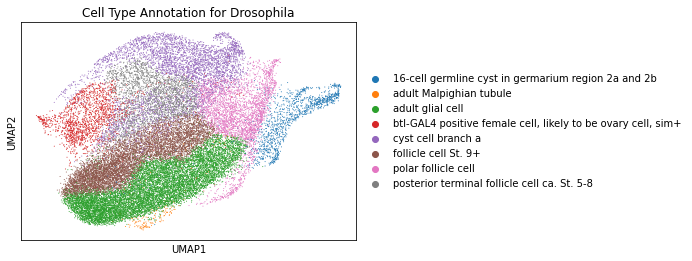

In [ ]:
sc.pl.umap(adata, color=['cell_type'], title=['Cell Type Annotation for Drosophila'])